In [55]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import random


In [56]:
def load_photos(directory):
    images = []
    labels_speed = []
    labels_dir = []
    dir_list = listdir(directory)
    #random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_dir = float(name.split('_')[1])
        value_speed = float(name.split('_')[0])
        labels_dir.append(value_dir)
        labels_speed.append(value_speed)
        images.append(image)
    return images, labels_speed, labels_dir

In [57]:
#dataset = "../../Pics/TestTrack/cleaned1"
#dataset = "../../Pics/TestTrack/mirrored1"
#dataset = "../../Pics/TestTrack/tagged2"
#dataset = "../../Pics/TestTrack/mirrored2"
#dataset = "../../Pics/TestTrack/test_noFE_mirrored"

#dataset = "../../Pics/RaceTrack/OldDataset_balanced"
#dataset = "../../Pics/RaceTrack/Datasets_Axionable/ironcar_pics"
#dataset = "../../Pics/RaceTrack/Mixed"
dataset = "../../Pics/RaceTrack/OldDataset_3"


In [58]:
# load images from both train and test groups
directory = '../../'+dataset+'/Train'
images, labels_speed, labels_dir = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
directory = '../../'+dataset+'/Val'
images_val, labels_speed_val, labels_dir_val = load_photos(directory)
nb_images_val = len(images_val)
print('Loaded Images and labels for validation: %d' % nb_images_val)

Loaded Images and labels for training: 1210
Loaded Images and labels for validation: 250


In [59]:
#Normalise images
images = np.array(images)
images /= 255

In [60]:
#convert datas to dummyvalues
labels_speed = np.array(pd.get_dummies(labels_speed))
labels_dir = np.array(pd.get_dummies(labels_dir))

(array([1, 0], dtype=uint8),
 array([1, 0, 0], dtype=uint8),
 <matplotlib.image.AxesImage at 0x24a5778bac8>)

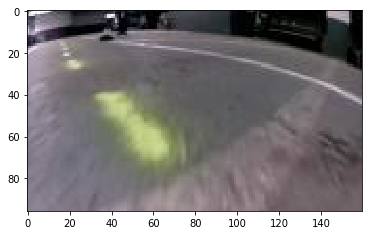

In [61]:
labels_speed[42], labels_dir[42], plt.imshow(images[42])

In [62]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [63]:
K.clear_session()
############################################################# Multitask Model 2

img_in = Input(shape=(96, 160, 3), name='img_in')
x = img_in

x = Convolution2D(8, (8,4), strides=(4,4), activation='relu')(x)
x = Convolution2D(8, (2,1), strides=(2,2), activation='relu')(x)
x = Convolution2D(8, (1,1), strides=(1,1), activation='relu')(x)

x = BatchNormalization()(x)

x = Flatten()(x)

x = Dense(8, activation='relu')(x)
x = Dropout(0.4)(x)

out_speed = Dense(2, activation='softmax')(x)
out_dir = Dense(3, activation='softmax')(x)

model = Model(inputs=[img_in], outputs=[out_speed, out_dir])
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 96, 160, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 23, 40, 8)    776         img_in[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 11, 20, 8)    136         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 11, 20, 8)    72          conv2d_2[0][0]                   
__________________________________________________________________________________________________
batch_norm

In [64]:
h = model.fit(images, [labels_speed, labels_dir], batch_size=128, epochs=100, verbose=1)

Epoch 1/100
1210/1210 [==============================] - 2s 1ms/step - loss: 1.6892 - dense_2_loss: 0.6602 - dense_3_loss: 1.0290 - dense_2_acc: 0.6008 - dense_3_acc: 0.5008
Epoch 2/100
1210/1210 [==============================] - 1s 959us/step - loss: 1.5177 - dense_2_loss: 0.5748 - dense_3_loss: 0.9429 - dense_2_acc: 0.7083 - dense_3_acc: 0.5702
Epoch 3/100
1210/1210 [==============================] - 1s 912us/step - loss: 1.4440 - dense_2_loss: 0.5456 - dense_3_loss: 0.8984 - dense_2_acc: 0.7157 - dense_3_acc: 0.5926
Epoch 4/100
1210/1210 [==============================] - 1s 1ms/step - loss: 1.3895 - dense_2_loss: 0.5316 - dense_3_loss: 0.8579 - dense_2_acc: 0.7488 - dense_3_acc: 0.6174
Epoch 5/100
1210/1210 [==============================] - 1s 978us/step - loss: 1.3403 - dense_2_loss: 0.5037 - dense_3_loss: 0.8366 - dense_2_acc: 0.7579 - dense_3_acc: 0.6165
Epoch 6/100
1210/1210 [==============================] - 1s 950us/step - loss: 1.3045 - dense_2_loss: 0.4897 - dense_3_loss:

1210/1210 [==============================] - 1s 893us/step - loss: 0.6898 - dense_2_loss: 0.2354 - dense_3_loss: 0.4543 - dense_2_acc: 0.9066 - dense_3_acc: 0.7702
Epoch 48/100
1210/1210 [==============================] - 1s 919us/step - loss: 0.6699 - dense_2_loss: 0.2156 - dense_3_loss: 0.4543 - dense_2_acc: 0.9198 - dense_3_acc: 0.7636
Epoch 49/100
1210/1210 [==============================] - 1s 917us/step - loss: 0.7122 - dense_2_loss: 0.2418 - dense_3_loss: 0.4704 - dense_2_acc: 0.9041 - dense_3_acc: 0.7669
Epoch 50/100
1210/1210 [==============================] - 1s 865us/step - loss: 0.7072 - dense_2_loss: 0.2330 - dense_3_loss: 0.4742 - dense_2_acc: 0.9066 - dense_3_acc: 0.7545
Epoch 51/100
1210/1210 [==============================] - 1s 918us/step - loss: 0.6849 - dense_2_loss: 0.2328 - dense_3_loss: 0.4521 - dense_2_acc: 0.9099 - dense_3_acc: 0.7744
Epoch 52/100
1210/1210 [==============================] - 1s 860us/step - loss: 0.6977 - dense_2_loss: 0.2429 - dense_3_loss: 0.

1210/1210 [==============================] - 2s 1ms/step - loss: 0.4916 - dense_2_loss: 0.1671 - dense_3_loss: 0.3245 - dense_2_acc: 0.9347 - dense_3_acc: 0.8430
Epoch 94/100
1210/1210 [==============================] - 2s 1ms/step - loss: 0.5233 - dense_2_loss: 0.1569 - dense_3_loss: 0.3664 - dense_2_acc: 0.9405 - dense_3_acc: 0.8140
Epoch 95/100
1210/1210 [==============================] - 2s 1ms/step - loss: 0.4950 - dense_2_loss: 0.1615 - dense_3_loss: 0.3336 - dense_2_acc: 0.9397 - dense_3_acc: 0.8355
Epoch 96/100
1210/1210 [==============================] - 2s 1ms/step - loss: 0.5427 - dense_2_loss: 0.1806 - dense_3_loss: 0.3621 - dense_2_acc: 0.9256 - dense_3_acc: 0.8256
Epoch 97/100
1210/1210 [==============================] - 2s 1ms/step - loss: 0.4897 - dense_2_loss: 0.1567 - dense_3_loss: 0.3329 - dense_2_acc: 0.9331 - dense_3_acc: 0.8421
Epoch 98/100
1210/1210 [==============================] - 2s 1ms/step - loss: 0.4946 - dense_2_loss: 0.1644 - dense_3_loss: 0.3301 - dense

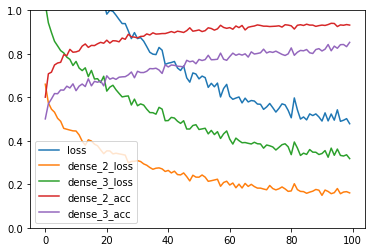

In [65]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [76]:
model.save('model_multi3_lt.h5')

In [14]:
#######################  VALIDATION

In [66]:
images_val = np.array(images_val)
images_val /= 255

In [67]:
# Get predictions
all_preds = model.predict(images_val)

speed_preds = []
for elem in all_preds[0]:
    speed_preds.append(np.argmax(elem))
    
dir_preds = []
for elem in all_preds[1]:
    dir_preds.append(np.argmax(elem))

In [68]:
res = 0
for i, value in enumerate(speed_preds):
    if value != labels_speed_val[i]:
        res += 1
print("error_rate = " + str(res/i))

error_rate = 0.1927710843373494


In [69]:
res = 0

i_0 = 1
res_0 = 0
res_0_1 = 0
res_0_2 = 0
res_0_3 = 0
res_0_4 = 0

i_1 = 1
res_1 = 0
res_1_1 = 0
res_1_2 = 0
res_1_3 = 0

i_2 = 1
res_2 = 0
res_2_1 = 0
res_2_2 = 0

i_3 = 1
res_3 = 0
res_3_1 = 0
res_3_2 = 0
res_3_3 = 0

i_4 = 1
res_4 = 0
res_4_1 = 0
res_4_2 = 0
res_4_3 = 0
res_4_4 = 0

for value in labels_dir_val:
    if value == 0:
        i_0 += 1
    elif value == 1:
        i_1 += 1
    elif value == 2:
        i_2 += 1
    elif value == 3:
        i_3 += 1
    elif value == 4:
        i_4 += 1

for i, value in enumerate(dir_preds):
    if value != labels_dir_val[i]:
        res += 1
        if labels_dir_val[i] == 0:    
            res_0 += 1
            if abs(labels_dir_val[i] - value) == 1:
                res_0_1 += 1
            elif abs(labels_dir_val[i] - value) == 2:
                res_0_2 += 1
            elif abs(labels_dir_val[i] - value) == 3:
                res_0_3 += 1
            elif abs(labels_dir_val[i] - value) == 4:
                res_0_4 += 1
        elif labels_dir_val[i] == 1:
            res_1 += 1
            if abs(labels_dir_val[i] - value) == 1:
                res_1_1 += 1
            elif abs(labels_dir_val[i] - value) == 2:
                res_1_2 += 1
            elif abs(labels_dir_val[i] - value) == 3:
                res_1_3 += 1
        elif labels_dir_val[i] == 2:
            res_2 += 1
            if abs(labels_dir_val[i] - value) == 1:
                res_2_1 += 1
            elif abs(labels_dir_val[i] - value) == 2:
                res_2_2 += 1
        elif labels_dir_val[i] == 3:
            res_3 += 1
            if abs(labels_dir_val[i] - value) == 1:
                res_3_1 += 1
            elif abs(labels_dir_val[i] - value) == 2:
                res_3_2 += 1
            elif abs(labels_dir_val[i] - value) == 3:
                res_3_3 += 1
        elif labels_dir_val[i] == 4:
            res_4 += 1
            if abs(labels_dir_val[i] - value) == 1:
                res_4_1 += 1
            elif abs(labels_dir_val[i] - value) == 2:
                res_4_2 += 1
            elif abs(labels_dir_val[i] - value) == 3:
                res_4_3 += 1
            elif abs(labels_dir_val[i] - value) == 4:
                res_4_4 += 1

        
print("total error = " + str(res/i), "0_error = " + str(res_0/i_0), "1_error = " + str(res_1/i_1), "2_error = " + str(res_2/i_2), "3_error = " + str(res_3/i_3), "4_error = " + str(res_4/i_4), )

total error = 0.27710843373493976 0_error = 0.5 1_error = 0.0728476821192053 2_error = 0.6944444444444444 3_error = 0.0 4_error = 0.0


Text(0.5,1,'Mean Errors by direction')

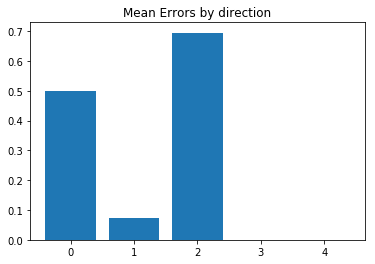

In [70]:
x = ['0','1','2','3','4']
plt.bar(x, height= [res_0/i_0, res_1/i_1, res_2/i_2, res_3/i_3, res_4/i_4])
plt.xticks(x, ['0','1','2','3','4']);
plt.title("Mean Errors by direction")

Text(0.5,1,'0 Errors')

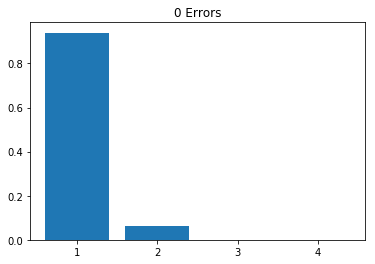

In [71]:
x = ['1','2','3','4']
plt.bar(x, height= [res_0_1/res_0, res_0_2/res_0, res_0_3/res_0, res_0_4/res_0])
plt.xticks(x, ['1','2','3','4']);
plt.title("0 Errors")

Text(0.5,1,'1 Errors')

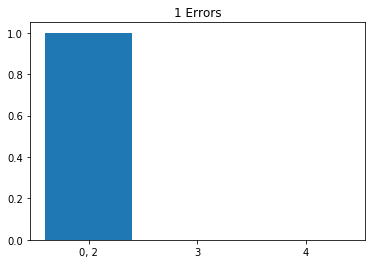

In [72]:
x = ['1','2','3']
plt.bar(x, height= [res_1_1/res_1, res_1_2/res_1, res_1_3/res_1])
plt.xticks(x, ['0, 2','3', '4']);
plt.title("1 Errors")

Text(0.5,1,'2 Errors')

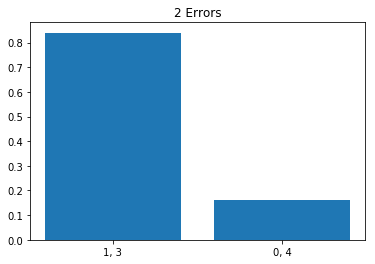

In [73]:
x = ['1','2']
plt.bar(x, height= [res_2_1/res_2, res_2_2/res_2])
plt.xticks(x, ['1, 3','0, 4']);
plt.title("2 Errors")

In [74]:
x = ['1','2','3']
plt.bar(x, height= [res_3_1/res_3, res_3_2/res_3, res_3_3/res_3])
plt.xticks(x, ['2, 4','1', '0']);
plt.title("3 Errors")

ZeroDivisionError: division by zero

In [75]:
x = ['1','2','3','4']
plt.bar(x, height= [res_4_1/res_4, res_4_2/res_4, res_4_3/res_4, res_4_4/res_4])
plt.xticks(x, ['3','2','1','0']);
plt.title("4 Errors")

ZeroDivisionError: division by zero